In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.datasets import cifar10

## Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print('X_train Shape : {}'.format(x_train.shape))
print('Train Samples : {}'.format(x_train.shape[0]))
print('Test Samples  : {}'.format(x_test.shape[0]))

X_train Shape : (50000, 32, 32, 3)
Train Samples : 50000
Test Samples  : 10000


## Preprocessing

####Convert To Categorical Data

In [0]:
# import library
from keras.utils import to_categorical

# Define Number classes
n_classes = 10

# Convert to categorical 
y_train = to_categorical(y_train, n_classes)
y_test  = to_categorical(y_test, n_classes)

### Scale Data

In [0]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [7]:
x_train.shape

(50000, 32, 32, 3)

### Create Model

In [9]:
# Define Model
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

W0814 10:05:06.169480 140436630501248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 10:05:06.213739 140436630501248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 10:05:06.222247 140436630501248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 10:05:06.267687 140436630501248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0814 10:05:06.272026 140436630501248 deprecation_wrapp

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        9248      
__________

#### Compile Model

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0814 10:06:32.069472 140436630501248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 10:06:32.084828 140436630501248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



#### Data Augmention

In [19]:
# Import Library
from keras.preprocessing.image import ImageDataGenerator
# Define Parameter
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

# Data augmentation

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        steps_per_epoch=200,
                        workers=4)

Using real-time data augmentation.
Epoch 1/100
200/200 [==============================] - 4s 22ms/step - loss: 1.9691 - acc: 0.2787 - val_loss: 1.8720 - val_acc: 0.3396
Epoch 2/100
200/200 [==============================] - 4s 21ms/step - loss: 1.8629 - acc: 0.3175 - val_loss: 1.7566 - val_acc: 0.3841
Epoch 3/100
200/200 [==============================] - 4s 22ms/step - loss: 1.8363 - acc: 0.3223 - val_loss: 1.7497 - val_acc: 0.3661
Epoch 4/100
200/200 [==============================] - 4s 21ms/step - loss: 1.8016 - acc: 0.3364 - val_loss: 1.8055 - val_acc: 0.3569
Epoch 5/100
200/200 [==============================] - 4s 21ms/step - loss: 1.7553 - acc: 0.3595 - val_loss: 1.6693 - val_acc: 0.4064
Epoch 6/100
200/200 [==============================] - 4s 21ms/step - loss: 1.7209 - acc: 0.3722 - val_loss: 1.6876 - val_acc: 0.3813
Epoch 7/100
200/200 [==============================] - 4s 21ms/step - loss: 1.7202 - acc: 0.3695 - val_loss: 1.5829 - val_acc: 0.4259
Epoch 8/100
200/200 [======

In [0]:
history = model.history

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

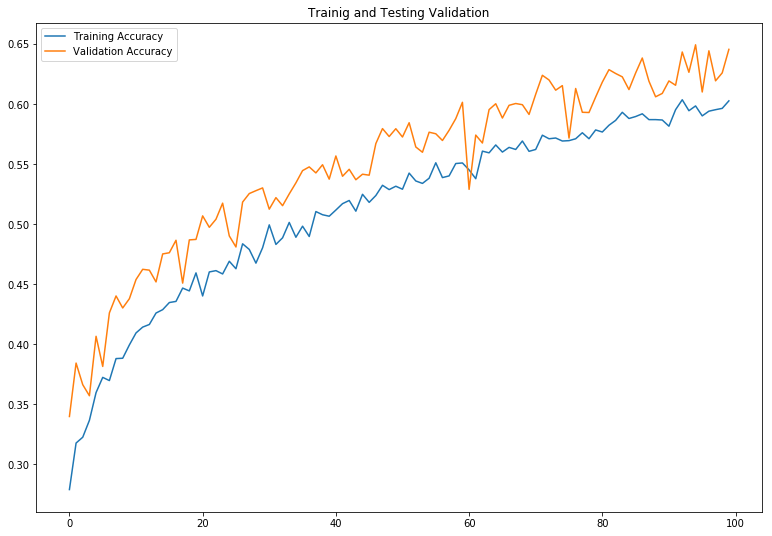

In [28]:
plt.figure(figsize=(13,9))
plt.title('Trainig and Testing Validation')
plt.plot(np.arange(0,100), acc, label='Training Accuracy')
plt.plot(np.arange(0,100), val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

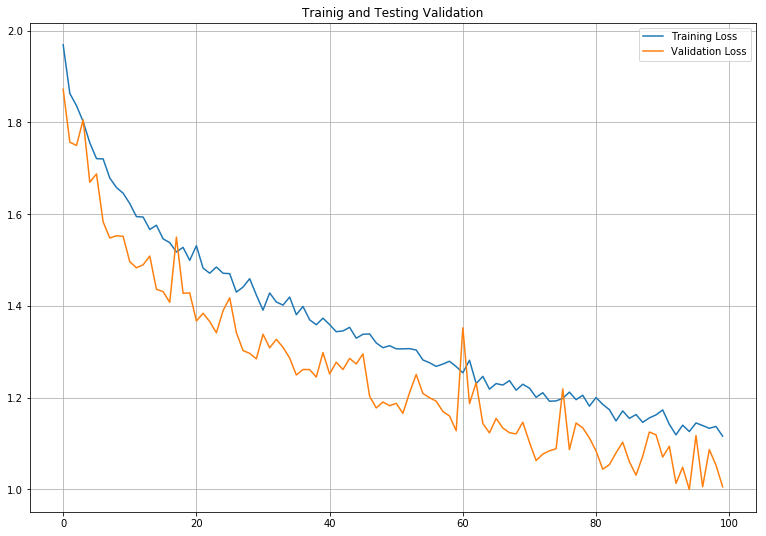

In [31]:
plt.figure(figsize=(13,9))
plt.title('Trainig and Testing Validation')
plt.plot(np.arange(0,100), loss, label='Training Loss')
plt.plot(np.arange(0,100), val_loss, label='Validation Loss')
plt.grid()
plt.legend()
plt.show()